# Sentiment Patterns Analysis Of Twitter(X)

Name - Siddharth Peeyush
LinkedIn--https://www.linkedin.com/in/siddharthpeeyush/
Prodigy InfoTech Internship : Task 04

Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Dataset -- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis?resource=download

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
twitts_train = pd.read_csv("F:/Downloads/twitter_training.csv")
twitts_valid = pd.read_csv("F:/Downloads/twitter_validation.csv")


In [4]:

# Naming each column
column_name=['TweetID','Entity','Sentiment','Tweet_Content']
twitts_train.columns=column_name
twitts_valid.columns=column_name
# Combining 2 dataframes to 1 dataframe
twitts=pd.concat([twitts_train,twitts_valid],ignore_index=False)
twitts.head()

,TweetID,Entity,Sentiment,Tweet_Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
twitts.columns.tolist()

['TweetID', 'Entity', 'Sentiment', 'Tweet_Content']

In [6]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75680 entries, 0 to 998
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TweetID        75680 non-null  int64 
 1   Entity         75680 non-null  object
 2   Sentiment      75680 non-null  object
 3   Tweet_Content  74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB



# Data Cleaning

In [7]:

twitts.isnull().sum()

TweetID            0
Entity             0
Sentiment          0
Tweet_Content    686
dtype: int64

In [8]:
twitts.duplicated().sum()


3216

In [9]:

twitts.dropna(inplace=True)
twitts.drop_duplicates(inplace=True)
print(twitts.isnull().sum())
print("Duplicate Values:",twitts.duplicated().sum())

TweetID          0
Entity           0
Sentiment        0
Tweet_Content    0
dtype: int64
Duplicate Values: 0


In [10]:
# Dropping Irrelevant columns:
twitts.drop(columns=['TweetID','Tweet_Content'],inplace=True)
twitts.head()

,Entity,Sentiment
0,Borderlands,Positive
1,Borderlands,Positive
2,Borderlands,Positive
3,Borderlands,Positive
4,Borderlands,Positive


In [11]:
twitts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72138 entries, 0 to 995
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Entity     72138 non-null  object
 1   Sentiment  72138 non-null  object
dtypes: object(2)
memory usage: 1.7+ MB


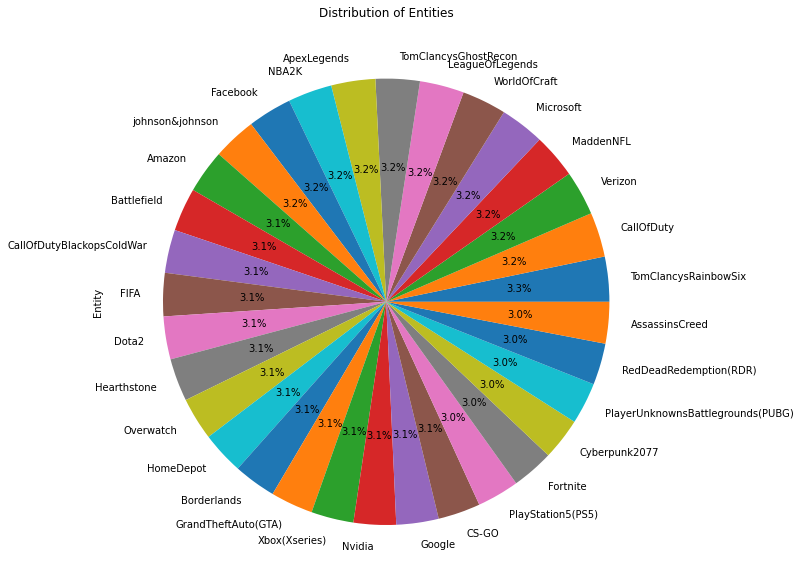

In [12]:

# Data Visualization

entity_content=twitts['Entity'].value_counts()
entity_content.plot(kind='pie', autopct='%1.1f%%', figsize=(10, 12))
plt.title('Distribution of Entities')
plt.show()

<AxesSubplot:>

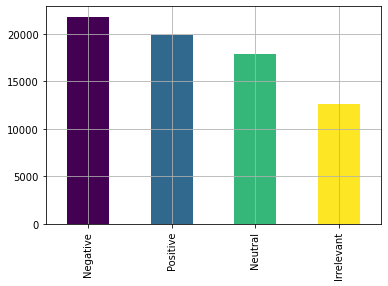

In [13]:

sentiment_content=twitts['Sentiment'].value_counts()
color=plt.get_cmap('viridis')
colors = [color(i) for i in np.linspace(0, 1, len(sentiment_content))]
sentiment_content.plot(kind='bar',color=colors,grid=True)

<AxesSubplot:xlabel='Entity'>

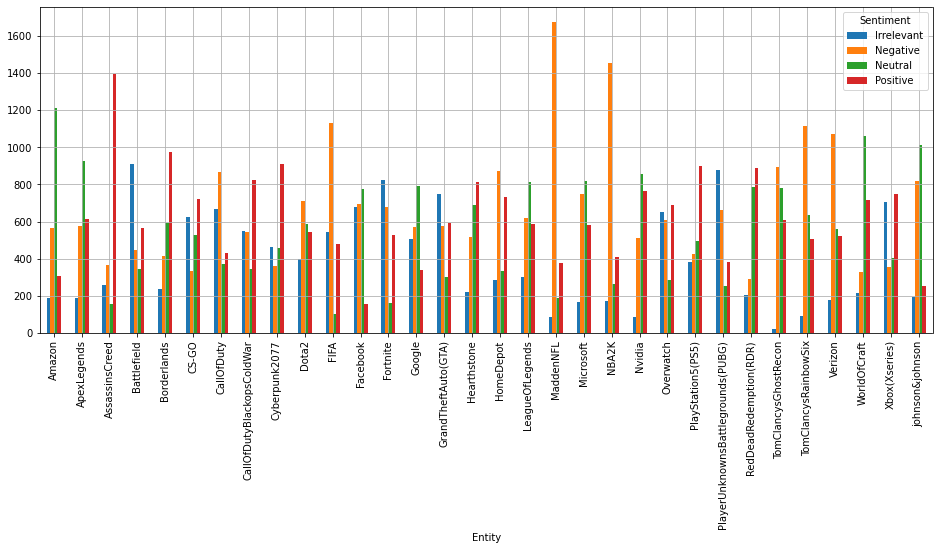

In [14]:

reactions_entities = pd.crosstab(twitts['Entity'],twitts['Sentiment'])
reactions_entities.plot(kind='bar', figsize=(16, 6),grid=True)

# MaddenNFL:

MaddenNFL received predominantly negative reactions, with users expressing dissatisfaction or criticism towards the content or experience associated with the brand.

# Battlefield: 

Feedback related to Battlefield was largely characterized by irrelevance, indicating that users' comments or opinions were not pertinent to the topic or context under discussion.

# Amazon:

Amazon garnered the highest proportion of neutral responses, suggesting that users' sentiments towards the brand were neither overtly positive nor negative, indicating a neutral stance or indifference.

# AssassinsCreed:

Reactions towards AssassinsCreed were overwhelmingly positive, with users expressing admiration, enthusiasm, or satisfaction towards the brand, its products, or associated experiences.



This alternate presentation offers a fresh perspective while conveying the same underlying information about the sentiment patterns observed among X (Prev. Twitter) users.
